In today's market, many companies have mobile presence. Often, these companies provide free product/services in their mobile app in an attempt to transition their customer to a paid membership. Some example of paid products, which originate from free ones, are YouTube Red, Pandora Premium, Audible Subscription and you need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.

- Market: The target audience is customers who use a company's free products. In this case study, this refers to users who installed (and used) the companies free mobile app.
- Product: The paid memberships often provide enhanced versions of the free products already given for free, alongside new features. For example, Youtube Red allows you to leave the app while still listening to a video.
- Goal: The objective of this model is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to convert them to paid users.

**Business Challenge**
In this Case Study we will be working for a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers, the company releases a free version of their app with some of the main features unlocked.
The company has tasked you to identify which users will mostly likely NOT enroll in paid products, so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.

**Problem Statement**
Identify which users will most likely NOT enrol in the paid products, so that additional offers can give to them. Because of cost, company does not want to offer them to everybody, especially customers who are going to enrol.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import sklearn
import statsmodels.api as sm 
import scipy.stats as st
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
sns.set()

## Importing Data

In [2]:
data = pd.read_csv('Fin_Tech_Data.csv')

## Checking On Data

In [3]:
data.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,32,0,0,1,56:37.8,1


In [4]:
data.shape

(50000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   numscreens            50000 non-null  int64 
 6   minigame              50000 non-null  int64 
 7   used_premium_feature  50000 non-null  int64 
 8   enrolled              50000 non-null  int64 
 9   enrolled_date         31074 non-null  object
 10  liked                 50000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.2+ MB


In [6]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [8]:
data.duplicated().sum()

15

## Imputing Missing Values

In [9]:
imputer=data.copy()

In [10]:
freq_imputer=SimpleImputer(strategy='most_frequent')

In [11]:
imputer.loc[:,['enrolled_date']]=freq_imputer.fit_transform(imputer.loc[:,['enrolled_date']])

In [12]:
imputer.isna().sum()

user                    0
first_open              0
dayofweek               0
hour                    0
age                     0
numscreens              0
minigame                0
used_premium_feature    0
enrolled                0
enrolled_date           0
liked                   0
dtype: int64

## Checking on Target Variable

In [13]:
imputer['liked'].value_counts()

0    41750
1     8250
Name: liked, dtype: int64

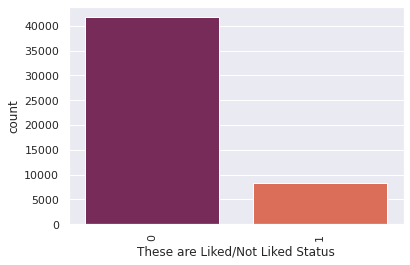

In [14]:
sns.countplot(imputer['liked'], palette = 'rocket')
plt.xticks(rotation=90)
plt.xlabel('These are Liked/Not Liked Status');

## Correlation

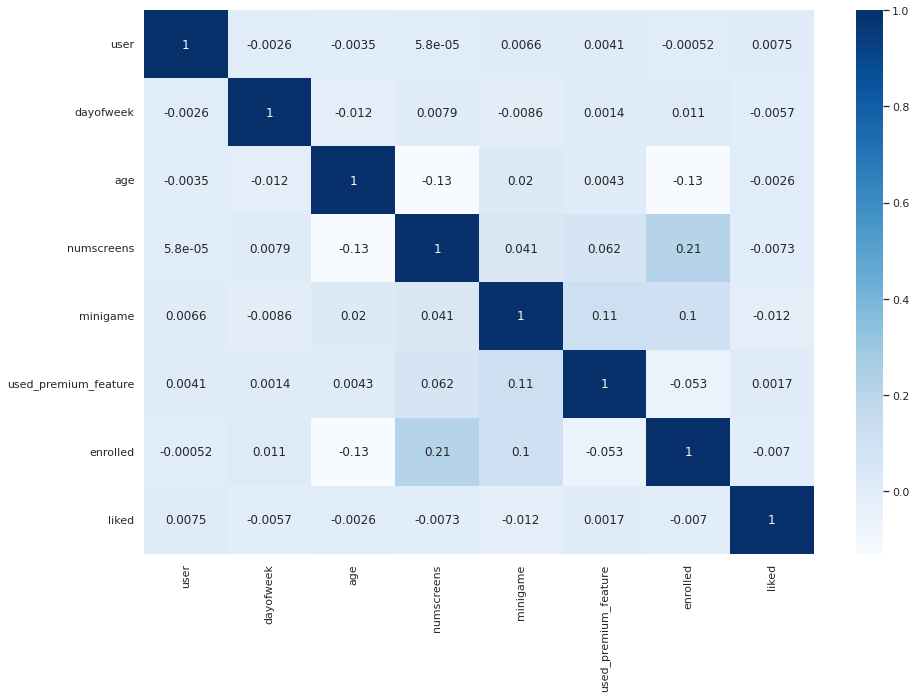

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues');

## Exploratry Data Analysis

In [16]:
def countp(x, data):
    plt.figure(figsize = (20,10))
    sns.countplot(x = x, data = data, hue = 'liked', palette = 'rocket')
    plt.xlabel(x)
    plt.xticks(rotation=90)

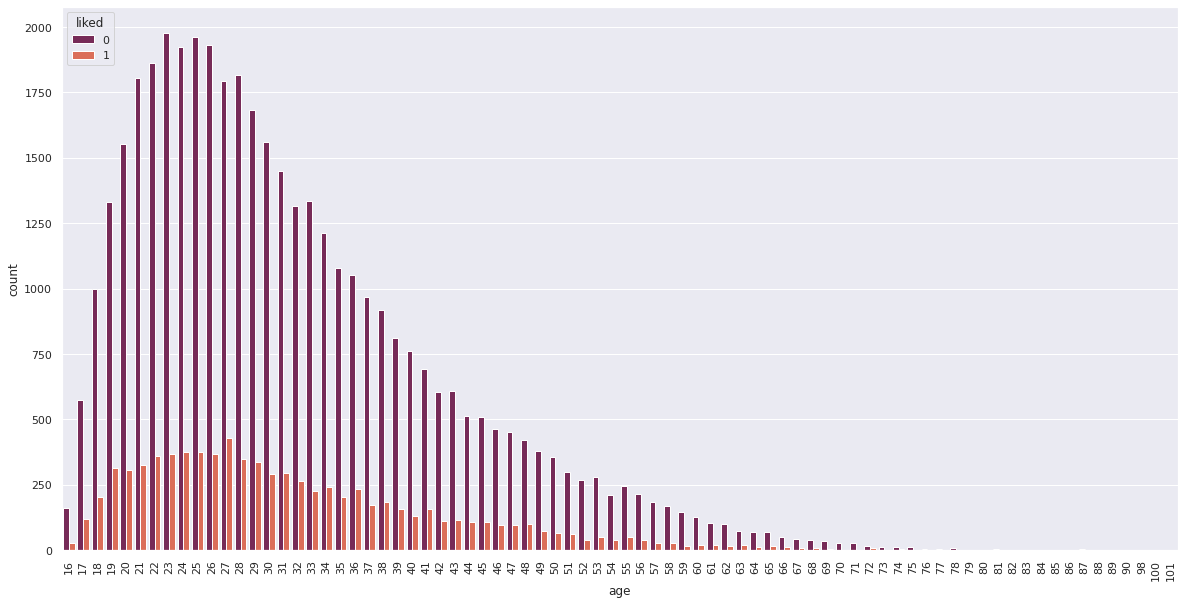

In [17]:
countp('age', imputer)

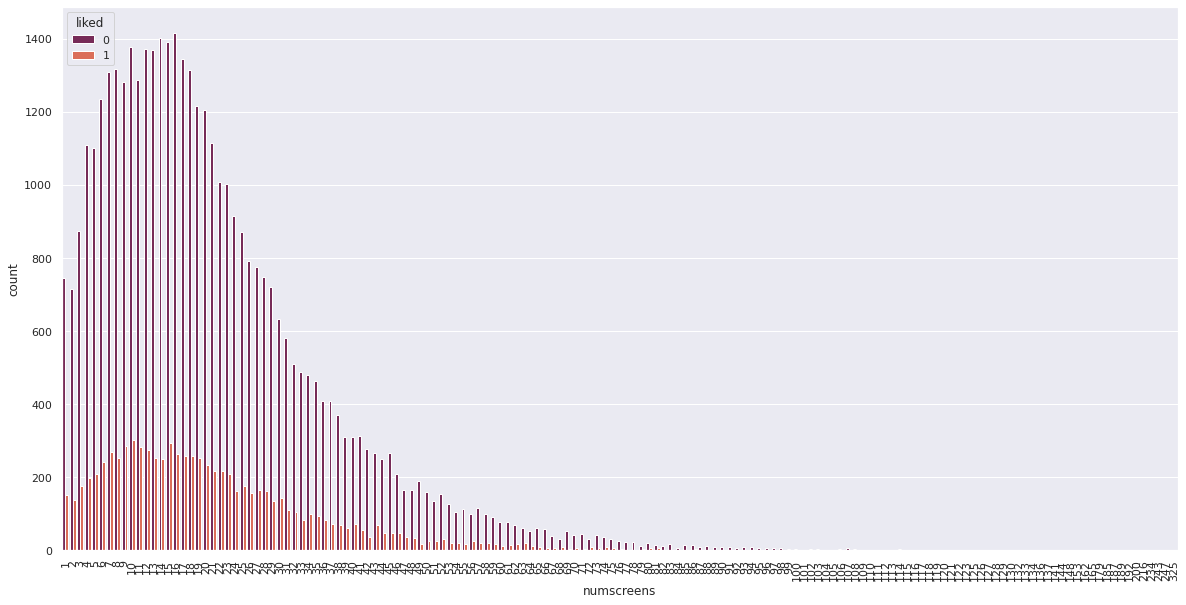

In [18]:
countp('numscreens', imputer)

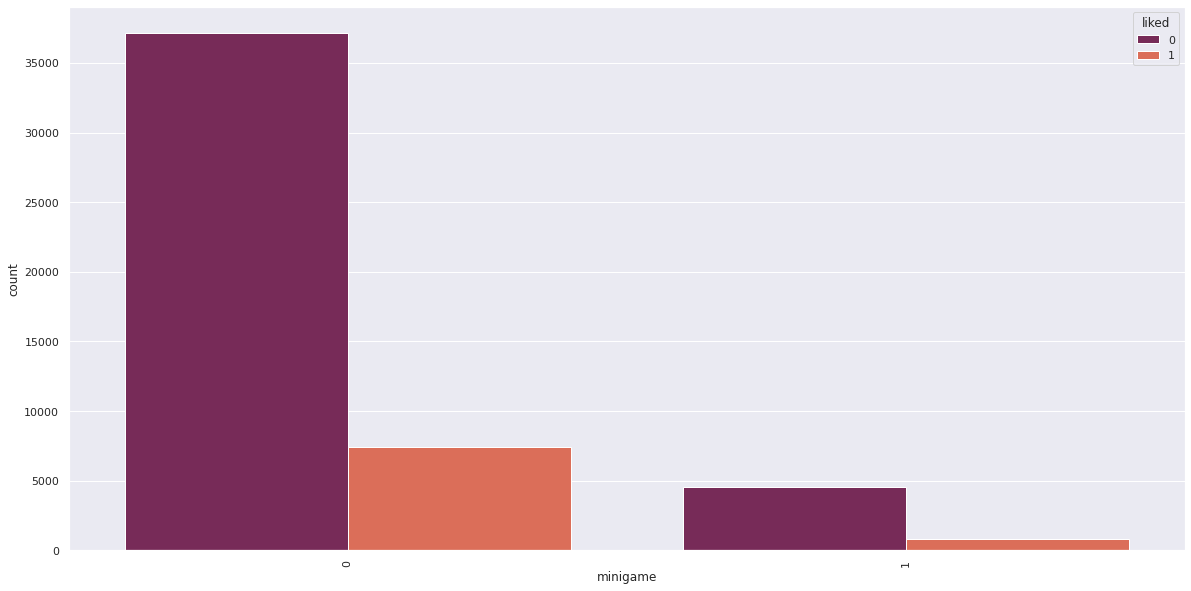

In [19]:
countp('minigame', imputer)

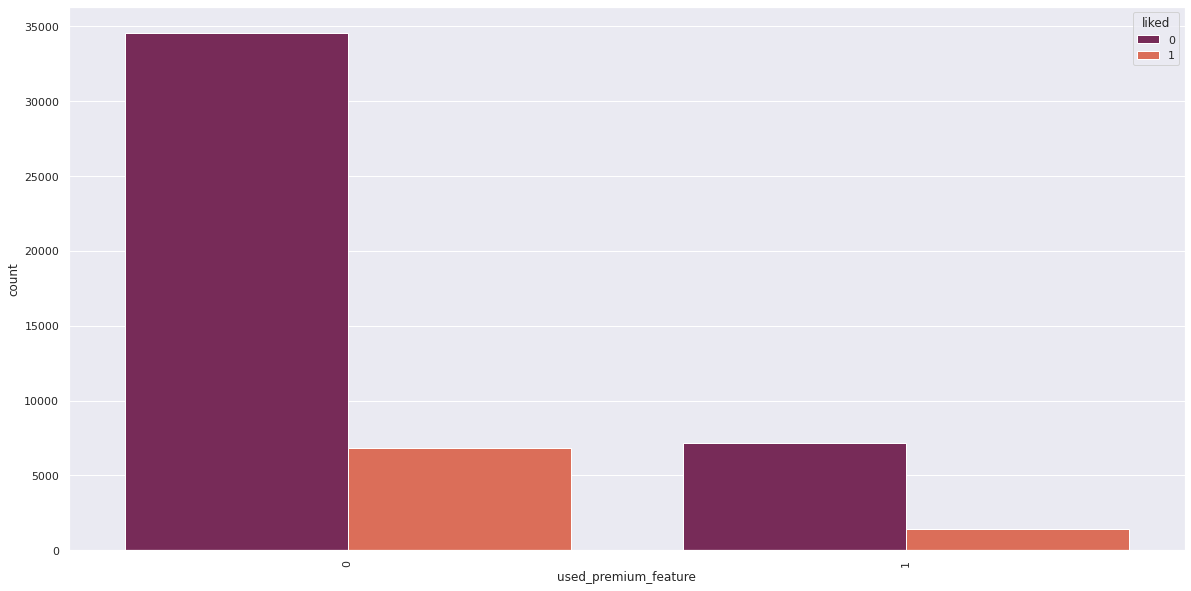

In [20]:
countp('used_premium_feature', imputer)

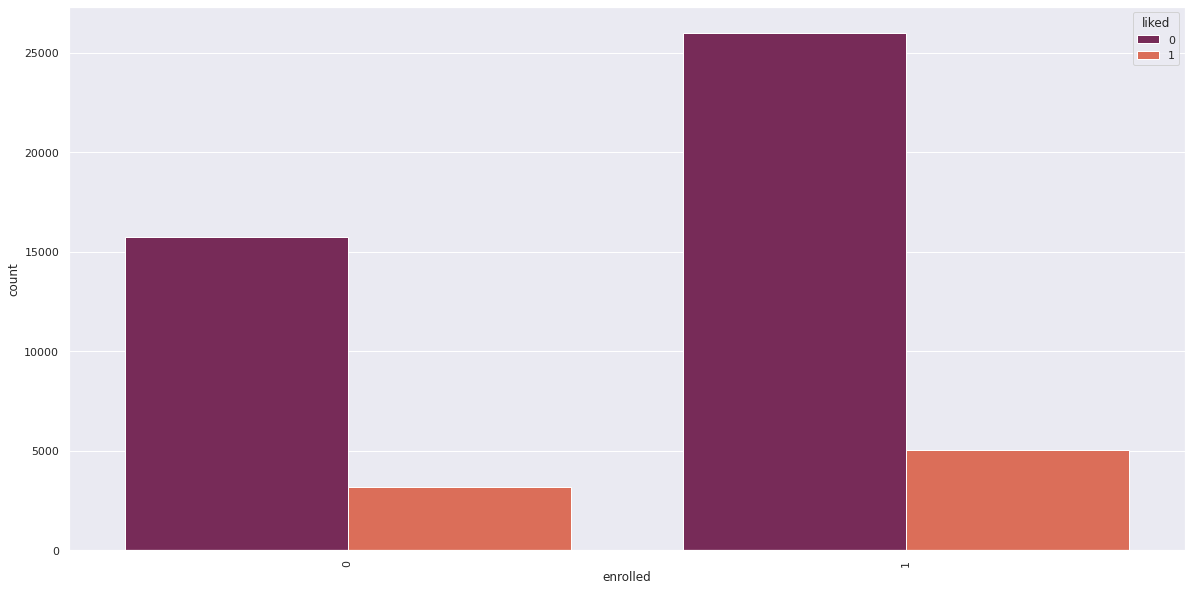

In [21]:
countp('enrolled', imputer)

## Outliers Treatment

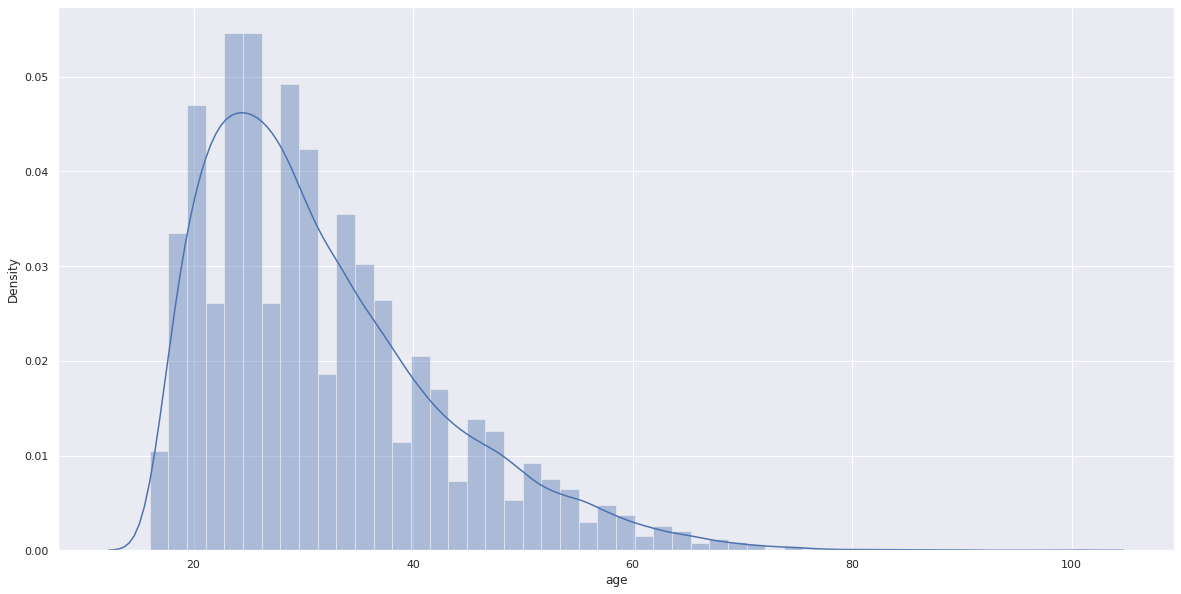

In [22]:
plt.figure(figsize = (20,10))
sns.distplot(data['age']);

In [23]:
data=imputer[imputer['age']<imputer['age'].quantile(.80)]

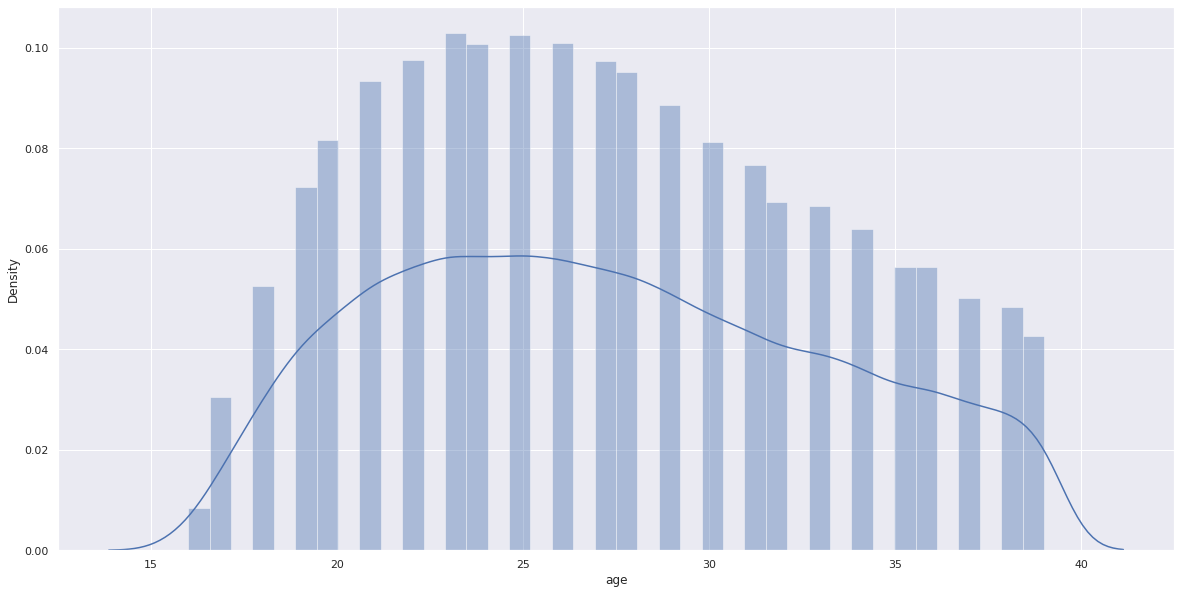

In [24]:
plt.figure(figsize = (20,10))
sns.distplot(data['age']);

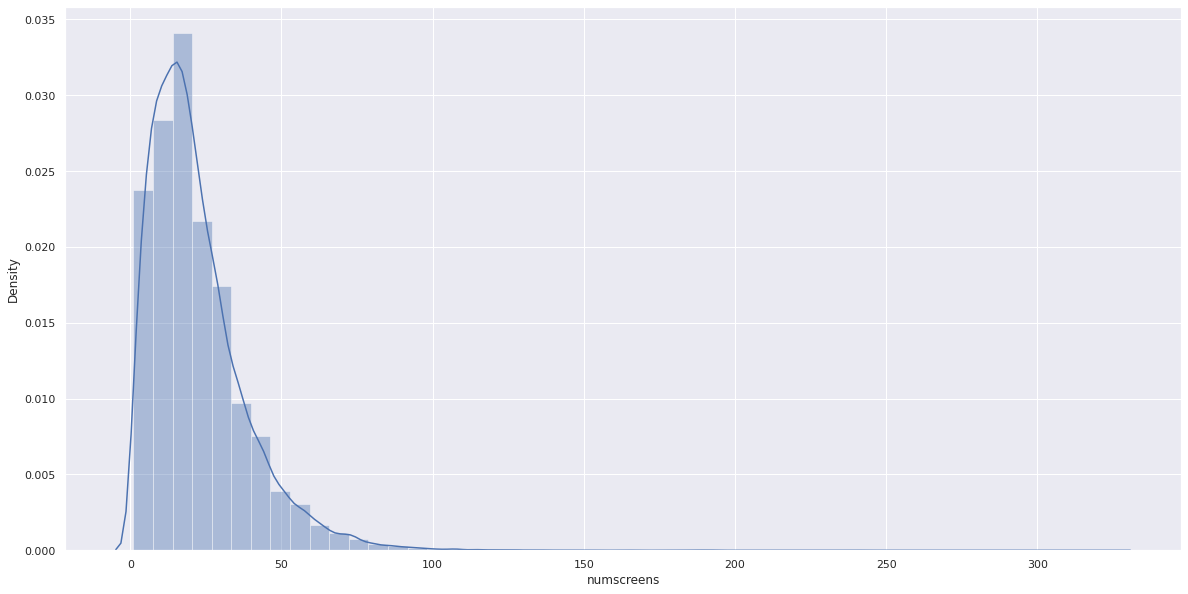

In [25]:
plt.figure(figsize = (20,10))
sns.distplot(data['numscreens']);

In [26]:
data=data[data['numscreens']<data['numscreens'].quantile(.80)]

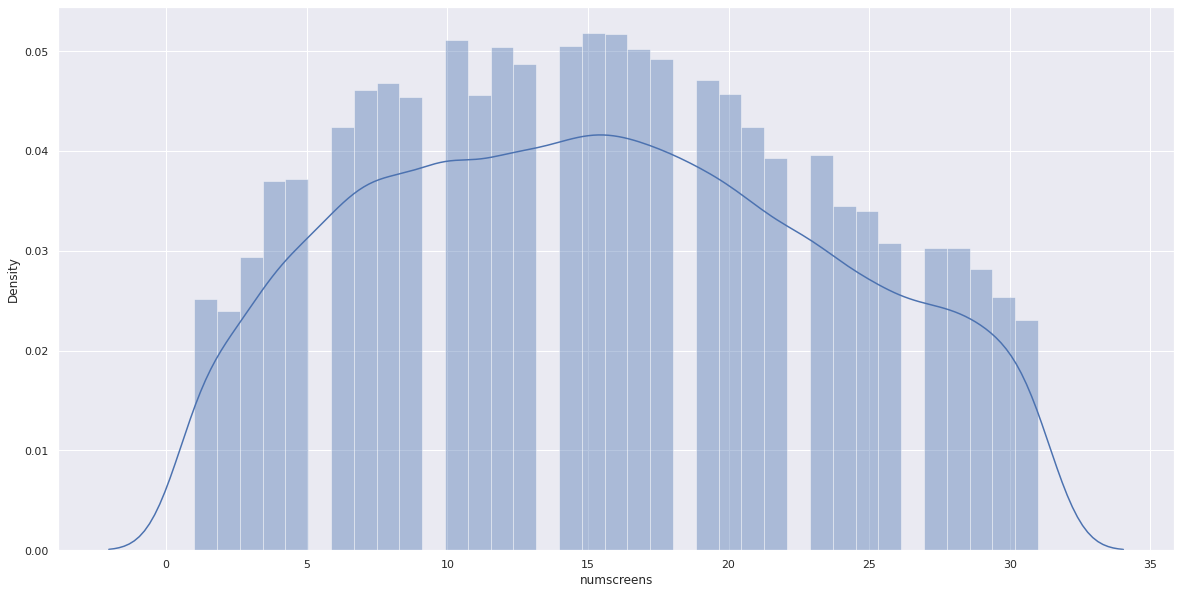

In [27]:
plt.figure(figsize = (20,10))
sns.distplot(data['numscreens']);

In [28]:
data.shape

(31211, 11)

## Model Building

In [29]:
data.drop('user', axis = 1, inplace = True)
data.drop('first_open', axis = 1, inplace = True)
data.drop('hour', axis = 1, inplace = True)
data.drop('enrolled_date', axis = 1,inplace = True)

## Logistic Regression

In [30]:
x = data.drop('liked', axis = 1)
y = data['liked']
x = sm.add_constant(x)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)

In [32]:
log_reg = LogisticRegression(solver = 'lbfgs', max_iter=100)

In [33]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [34]:
y_pred = log_reg.predict(x_test)

In [35]:
log_reg.predict_proba(x_test)[0:28]

array([[0.82797215, 0.17202785],
       [0.821574  , 0.178426  ],
       [0.83613181, 0.16386819],
       [0.83284661, 0.16715339],
       [0.83564528, 0.16435472],
       [0.82579266, 0.17420734],
       [0.84289311, 0.15710689],
       [0.8249925 , 0.1750075 ],
       [0.82791127, 0.17208873],
       [0.83124472, 0.16875528],
       [0.83113196, 0.16886804],
       [0.83342062, 0.16657938],
       [0.83517626, 0.16482374],
       [0.8298819 , 0.1701181 ],
       [0.83154256, 0.16845744],
       [0.82611062, 0.17388938],
       [0.82908934, 0.17091066],
       [0.8311011 , 0.1688989 ],
       [0.84084798, 0.15915202],
       [0.84698769, 0.15301231],
       [0.83197185, 0.16802815],
       [0.82871131, 0.17128869],
       [0.8246299 , 0.1753701 ],
       [0.83371405, 0.16628595],
       [0.83531541, 0.16468459],
       [0.82988481, 0.17011519],
       [0.82745868, 0.17254132],
       [0.83173351, 0.16826649]])

In [36]:
log_reg.coef_[0:100]

array([[-0.75320893, -0.01232061, -0.00183972,  0.00170692, -0.07218855,
        -0.02354967, -0.03035134]])

In [37]:
def confusion_matrix(actuals,predicted):
    cm = metrics.confusion_matrix(actuals,predicted)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot = True, fmt ='.2f', xticklabels=['Liked', 'Not Liked'], 
                yticklabels=['Liked', 'Not Liked'])
    
    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")

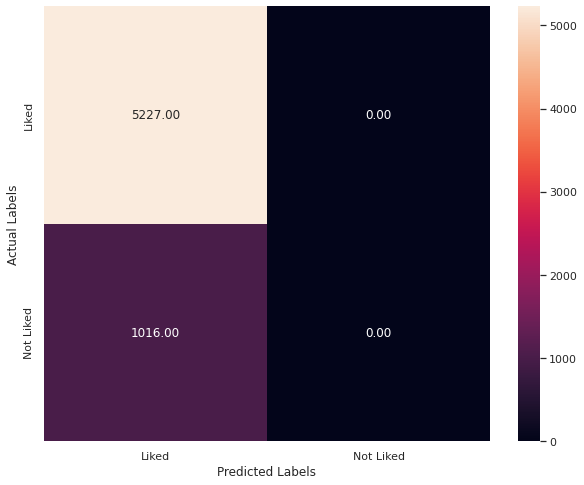

In [38]:
confusion_matrix(y_test, y_pred)

In [39]:
print(metrics.classification_report(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      5227
           1       0.00      0.00      0.00      1016

    accuracy                           0.84      6243
   macro avg       0.42      0.50      0.46      6243
weighted avg       0.70      0.84      0.76      6243



## Decision Tree

In [40]:
dtc=DecisionTreeClassifier()

In [41]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
dtc_pred=dtc.predict(x_test)

In [43]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5227
           1       0.17      0.11      0.13      1016

    accuracy                           0.77      6243
   macro avg       0.51      0.50      0.50      6243
weighted avg       0.73      0.77      0.75      6243



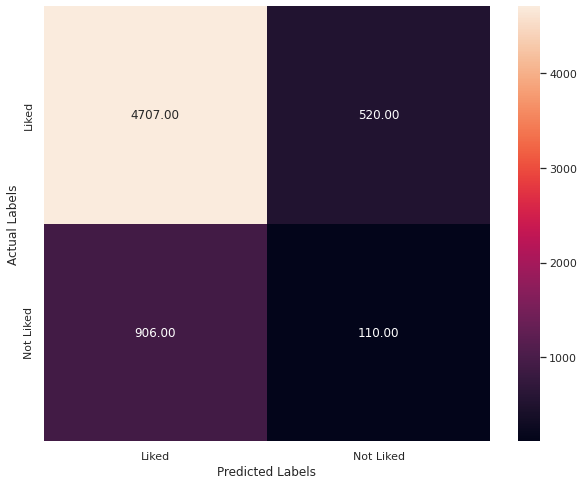

In [44]:
confusion_matrix(y_test, dtc_pred)


## KNeighbours Classifier

In [45]:
knn=KNeighborsClassifier()


In [46]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [47]:
knn_pred=knn.predict(x_test)

In [48]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5227
           1       0.17      0.04      0.07      1016

    accuracy                           0.81      6243
   macro avg       0.50      0.50      0.48      6243
weighted avg       0.73      0.81      0.76      6243



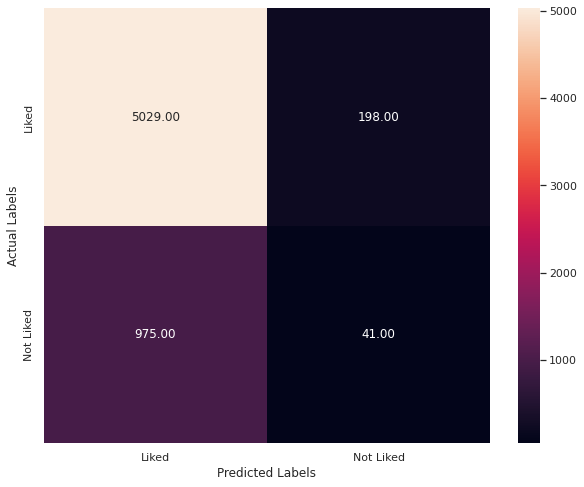

In [49]:
confusion_matrix(y_test, knn_pred)

## Random Forest Regressor


In [50]:
forest= RandomForestClassifier(n_estimators=10, random_state=17)

In [51]:
forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=17)

In [52]:
y_train_pred=forest.predict(x_train)
y_test_pred=forest.predict(x_test)
print('Mean Squared error(train):{: .3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Mean Squared error(houldout):{: .3f}'.format(mean_squared_error(y_test, y_test_pred)))

Mean Squared error(train): 0.116
Mean Squared error(houldout): 0.222


In [53]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5227
           1       0.19      0.12      0.14      1016

    accuracy                           0.78      6243
   macro avg       0.52      0.51      0.51      6243
weighted avg       0.74      0.78      0.75      6243



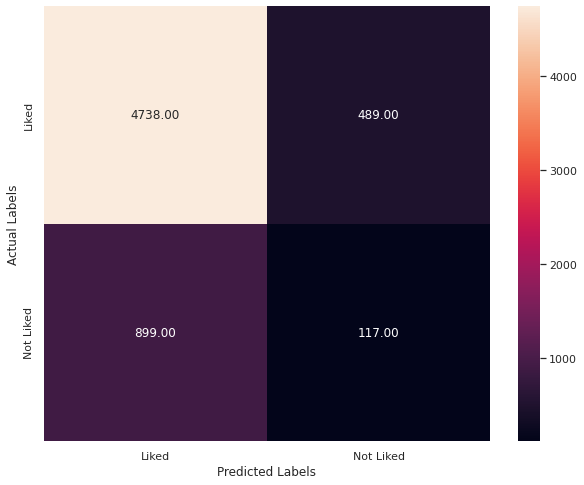

In [54]:
confusion_matrix(y_test, y_test_pred)

In [55]:
forest_parms={'max_depth': range(10,25), 'max_features': range(6,12)}
locally_best_forest=GridSearchCV(forest, forest_parms, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
locally_best_forest.fit(x_train, y_train)
print(abs(locally_best_forest.best_score_), locally_best_forest.best_params_)

0.16973725570624665 {'max_depth': 10, 'max_features': 7}


<AxesSubplot:>

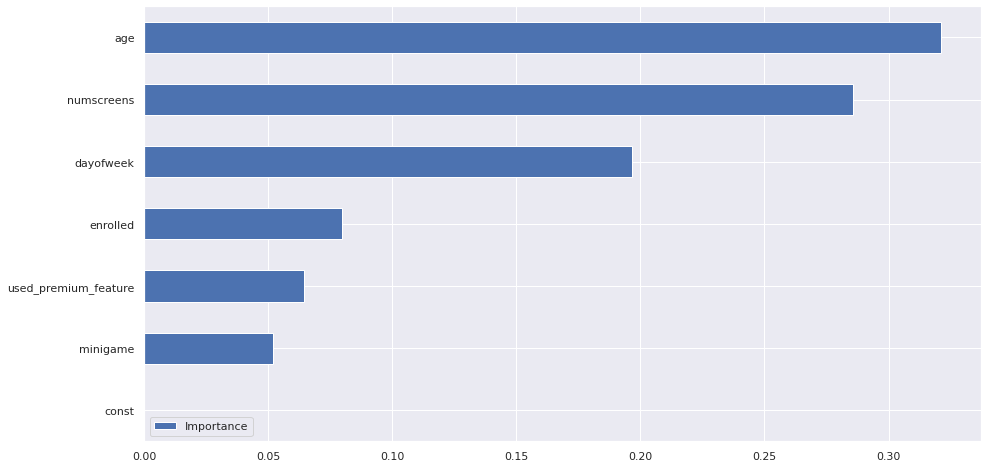

In [56]:
importance =pd.DataFrame(locally_best_forest.best_estimator_.feature_importances_, index=x.columns,
                         columns=['Importance'])
importance.sort_values('Importance').plot(kind='barh', figsize=(15,8))

In [57]:
report = classification_report(y_test, y_pred, output_dict=True)

In [58]:
report_dtc = classification_report(y_test, dtc_pred, output_dict=True)

In [59]:
report_knn = classification_report(y_test, knn_pred, output_dict=True)

In [60]:
report_rf = classification_report(y_test, y_test_pred, output_dict=True)

In [65]:
comparision = pd.DataFrame({'Logisitic':report,'Decision Tree': report_dtc ,'KNN':report_knn, 
                            'Random Forest':report_rf})

In [70]:
comparision

,Logisitic,Decision Tree,KNN,Random Forest
0,"{'precision': 0.8372577286560948, 'recall': 1....","{'precision': 0.8385889898450026, 'recall': 0....","{'precision': 0.8376082611592272, 'recall': 0....","{'precision': 0.8405180060315771, 'recall': 0...."
1,"{'precision': 0.0, 'recall': 0.0, 'f1-score': ...","{'precision': 0.1746031746031746, 'recall': 0....","{'precision': 0.17154811715481172, 'recall': 0...","{'precision': 0.19306930693069307, 'recall': 0..."
accuracy,0.837258,0.771584,0.81211,0.777671
macro avg,"{'precision': 0.4186288643280474, 'recall': 0....","{'precision': 0.5065960822240886, 'recall': 0....","{'precision': 0.5045781891570195, 'recall': 0....","{'precision': 0.5167936564811351, 'recall': 0...."
weighted avg,"{'precision': 0.7010005041943629, 'recall': 0....","{'precision': 0.7305304301324129, 'recall': 0....","{'precision': 0.7292121204723001, 'recall': 0....","{'precision': 0.7351507341612427, 'recall': 0...."


From this we can say that **Logistic** have the highest accuracy **83%**. Followed by **KNN (81%)** 